In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [7]:
from tensorflow.keras.applications.resnet50 import preprocess_input

# ResNet50 expects images of size 224x224
img_size = 224
batch_size = 32
data_path =data_path = r'D:\lung cancer model\Lung Cancer DS\lung_colon_image_set\lung_image_sets'
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  # 20% data for validation
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [8]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False


In [9]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

# Final model
model_resnet50 = Model(inputs=base_model.input, outputs=predictions)


In [10]:
train_dir = r'D:\lung cancer model\Lung Cancer DS\lung_colon_image_set\lung_image_sets'  # Replace with your actual training data path
val_dir = r'D:\lung cancer model\Lung Cancer DS\lung_colon_image_set\lung_image_sets'  # Replace with your actual validation data path
val_datagen = ImageDataGenerator(rescale=1./255)
# Define your classes
list_of_your_3_classes = ["adenocarcinoma","normal", "squamous_cell_carcinoma"] 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=list_of_your_3_classes  # Specify only 3 classes that match your model
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=list_of_your_3_classes  # Same 3 classes as training
)

model_resnet50.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model
history_resnet50 = model_resnet50.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Found 15000 images belonging to 3 classes.
Found 15000 images belonging to 3 classes.
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 818s 2s/step - accuracy: 0.9385 - loss: 0.1523 - val_accuracy: 0.3333 - val_loss: 3.4388
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 801s 2s/step - accuracy: 0.9683 - loss: 0.0783 - val_accuracy: 0.3333 - val_loss: 3.2088
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 799s 2s/step - accuracy: 0.9756 - loss: 0.0604 - val_accuracy: 0.3333 - val_loss: 3.7184
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 800s 2s/step - accuracy: 0.9823 - loss: 0.0470 - val_accuracy: 0.3333 - val_loss: 4.0554
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 799s 2s/step - accuracy: 0.9833 - loss: 0.0440 - val_accuracy: 0.3333 - val_loss: 4.3145
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 809s 2s/step - accuracy: 0.9848 - loss: 0.0410 - val_accuracy: 0.3333 - val_loss: 3.9805
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 812s 2s/step - accuracy: 0.9881 - loss: 0.0329 - val_accuracy: 0.3333 - val_loss: 4.7012
Epoch 8/10


In [11]:
loss, acc = model_resnet50.evaluate(val_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")


469/469 ━━━━━━━━━━━━━━━━━━━━ 408s 870ms/step - accuracy: 0.3333 - loss: 8.3552
Validation Accuracy: 33.33%


In [12]:
model_resnet50.save("lung_cancer_resnet50.keras")

In [13]:
import matplotlib.pyplot as plt


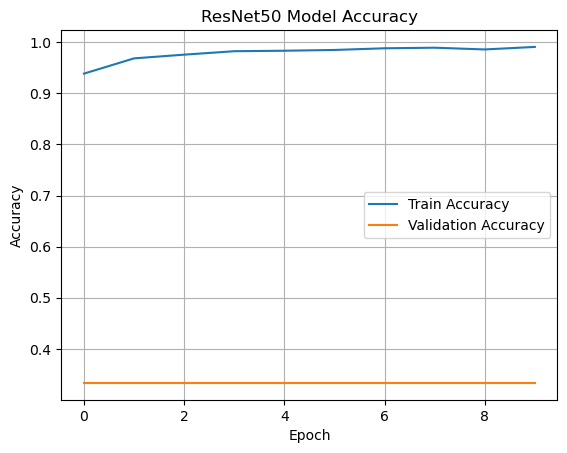

In [14]:
plt.plot(history_resnet50.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


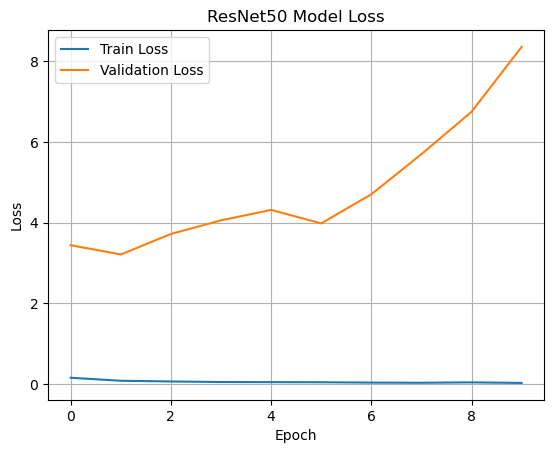

In [15]:
plt.plot(history_resnet50.history['loss'], label='Train Loss')
plt.plot(history_resnet50.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
!pip install seaborn

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# Get true labels
y_true = val_generator.classes

# Get predicted probabilities
y_pred_probs = model_resnet50.predict(val_generator)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)


469/469 ━━━━━━━━━━━━━━━━━━━━ 415s 877ms/step


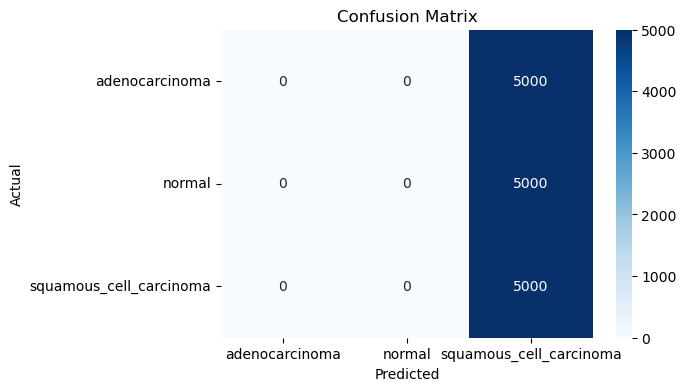

In [19]:
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_generator.class_indices,
            yticklabels=val_generator.class_indices)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# target_names = list(val_generator.class_indices.keys())

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=target_names))
